<a href="https://colab.research.google.com/github/LatoyaInnocent/Python/blob/main/Boston_Housing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
df_boston = pd.DataFrame(boston_dataset.data)
df_boston. columns = boston_dataset.feature_names
df_boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
df_boston['Price'] = boston_dataset.target

In [6]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


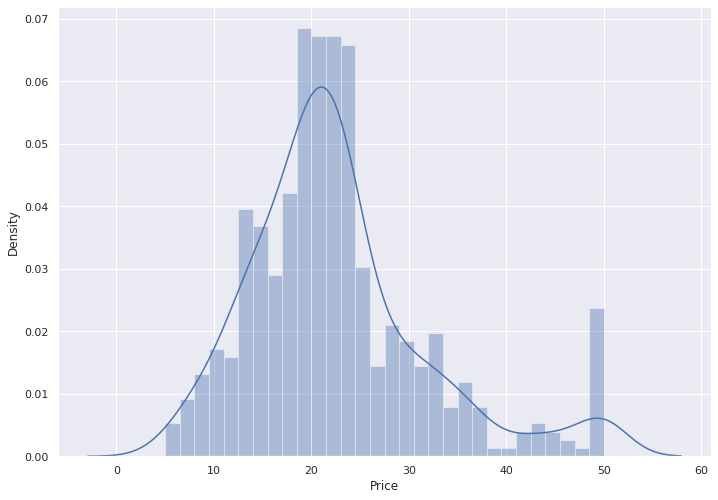

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df_boston['Price'], bins=30)
plt.show()

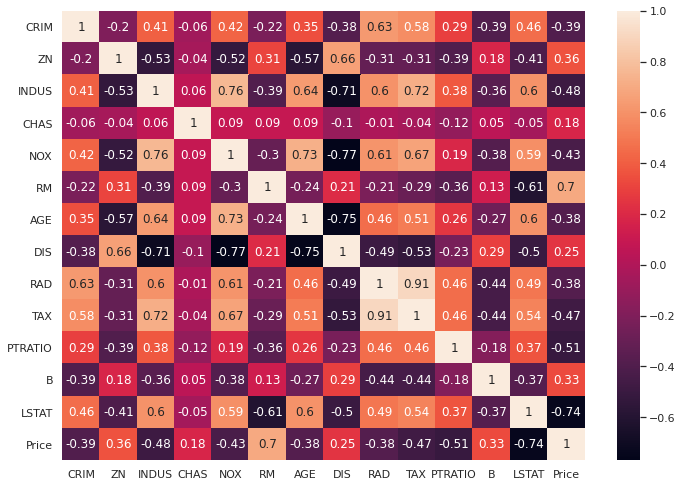

In [13]:
correlation_matrix = df_boston.corr().round(2)
sns.heatmap(data=correlation_matrix , annot = True )

OBSERVATION:
- There is a negative correlation between price and crime. A 1% increase in crime causes price to decrease by -0.39.

- There is a positive correlation between crime and age. As age increases so does the likelihood of crime.

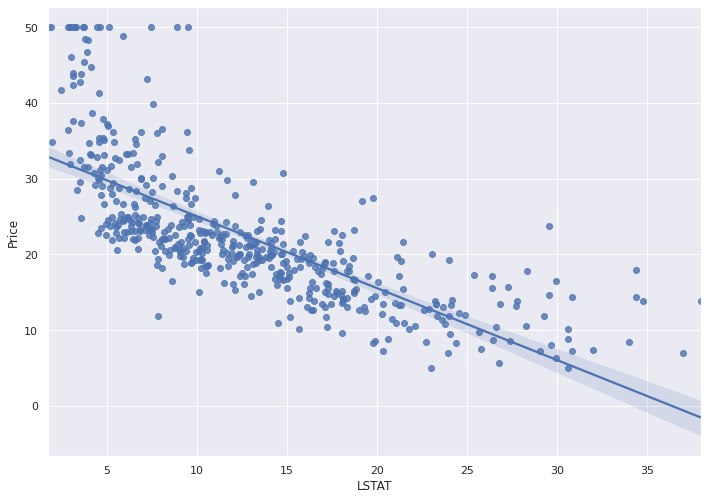

In [14]:
sns.regplot(y=df_boston['Price'], x=df_boston['LSTAT'])

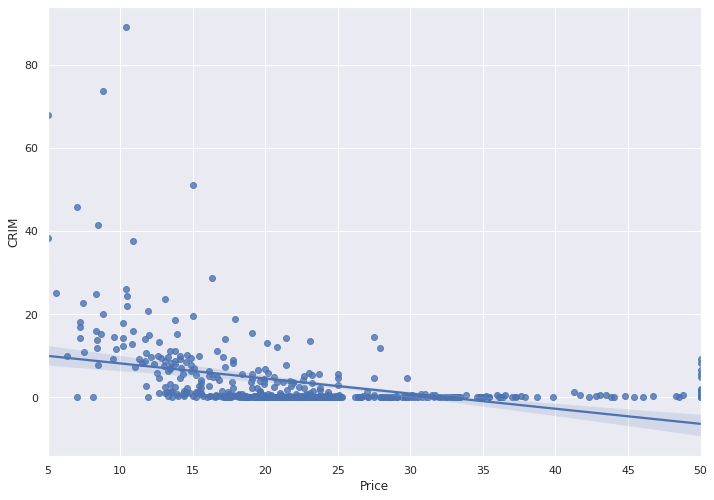

In [15]:
sns.regplot(x=df_boston['Price'], y=df_boston['CRIM' ])

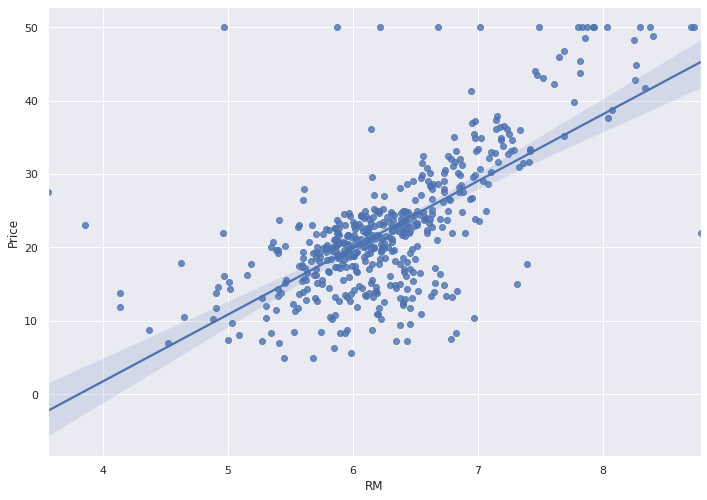

In [16]:
sns.regplot(y=df_boston['Price'], x=df_boston['RM'])

In [17]:
X_features = boston_dataset.data

In [19]:
Y_target = boston_dataset.target

In [20]:
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [21]:
lineReg.fit(X_features,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('The estimated intercept %.2f '%lineReg.intercept_)

The estimated intercept 36.46 


In [25]:
print('The estimated coefficient %d '%len(lineReg.coef_))

The estimated coefficient 13 


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y_target)

In [27]:
print(boston_dataset.data.shape)

(506, 13)


In [28]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 13) (127, 13) (379,) (127,)


In [29]:
lineReg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
y_train_predict = lineReg.predict(X_train)

In [33]:
rsme = np.sqrt(mean_squared_error(Y_train,y_train_predict))

In [35]:
r2 = r2_score(Y_train, y_train_predict)
print('The model performance for training set')
print('--------------------------------------')
print('RSME is {}' .format(rsme))
print('R2 score is {}' .format(r2))
print('\n')

The model performance for training set
--------------------------------------
RSME is 4.422750050893052
R2 score is 0.7427779455397504




In [51]:
y_test_predict = lineReg.predict(X_test)
rsme = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))

r2 = r2_score(Y_test, y_test_predict)

print('The model performance for testing set')
print('-------------------------------------')
print('RMSE is {}' .format(rsme))
print('R2 score is {}' .format(r2))

The model performance for testing set
-------------------------------------
RMSE is 5.463701422891794
R2 score is 0.7258246784792757


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


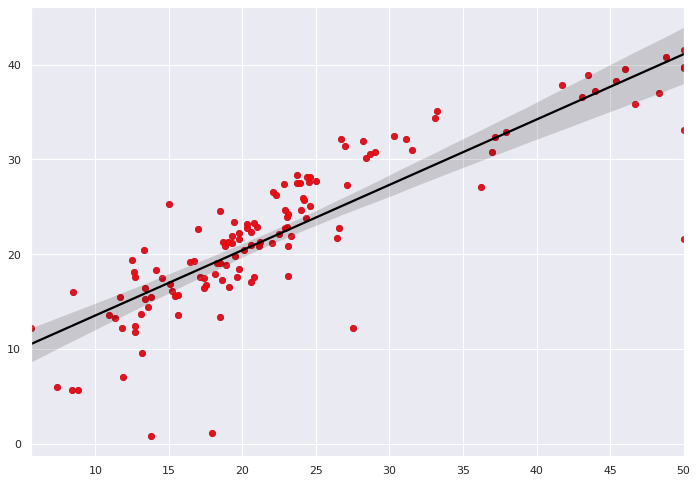

In [58]:
import pandas as pd
import seaborn as sns

scatter=plt.scatter(Y_test, y_test_predict)
regplot=sns.regplot(Y_test, y_test_predict,x='Y_test', y='y_test_predict', data = scatter, scatter_kws={'color': 'red'}, line_kws={'color':'black'})

CONCLUSION
- The model is able to estimate a very close prediction to the testing data set. 
This prediction can be seen in the cluster of red dots along the black line.